In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np

from shapely.ops import cascaded_union
from shapely.geometry import Polygon

# get state abbreviation (UF)
UF = 'AM'

# import the municipalities shapes from the IBGE municipalities dataset (2021)
#   -> (https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais)
mun_df = gpd.read_file("../../data/%s/%s_Municipios_2021.dbf"%(UF, UF), encoding = "utf-8")
mun_df['code'] = np.array([item[:-1] for item in np.array(mun_df.CD_MUN)]).astype('int') # trim last char

# import the municipality-region-macroregion relations
reg_macro_df = pd.read_csv("../../data/%s/reg_macro_table.csv"%UF)

# ---------MACROREGION----------
regions_boundary, names, years = [], [], []
for year in [2019]:
    mun_df['macroregion'] = reg_macro_df[reg_macro_df['year']==year].macroregion.values
    dissolved = mun_df[['macroregion', 'geometry']].dissolve(by='macroregion')
    regions_boundary += dissolved.geometry.to_list()
    years += [year]*len(dissolved)
    names += dissolved.index.to_list()

# saving regions shape to file
macroregions_gdf = gpd.GeoDataFrame({
    'name': names,
    'year': years,
    'geometry': regions_boundary
})
macroregions_gdf['geometry'] = macroregions_gdf['geometry'].simplify(tolerance=0.01)
#macroregions_gdf.to_file("../../data/%s/template_dashboard/shapes/macroregions/shape.shp"%UF)
macroregions_gdf

name  year                                           geometry
0  Central  2019  POLYGON ((-67.50056 -7.24719, -67.44241 -6.982...
1    Leste  2019  POLYGON ((-58.14737 -7.34324, -58.14072 -7.363...
2    Oeste  2019  POLYGON ((-69.49104 -7.20315, -69.47445 -7.252...

In [16]:
macroregions_gdf['center'] = macroregions_gdf['geometry'].centroid

In [17]:
macroregions_gdf['center'] = macroregions_gdf['center'].apply(lambda point: str([point.x, point.y]))

In [18]:
macroregions_gdf['center']

0    [-64.5801949329809, -3.4202327918909665]
1    [-59.713461151252574, -5.31150506386977]
2    [-68.70673643686315, -4.527961254801425]
Name: center, dtype: object

In [15]:
[macroregions_gdf['center'][0].y, macroregions_gdf['center'][0].x]

[-19.143447002693343, -44.11541156048858]

In [17]:
macroregions_gdf['geometry'].centroid

name  year                                    center  \
0  Central  2019  [-64.5801949329809, -3.4202327918909665]   
1    Leste  2019  [-64.5801949329809, -3.4202327918909665]   
2    Oeste  2019  [-64.5801949329809, -3.4202327918909665]   

                                            geometry  
0  POLYGON ((-67.50056 -7.24719, -67.44241 -6.982...  
1  POLYGON ((-58.14737 -7.34324, -58.14072 -7.363...  
2  POLYGON ((-69.49104 -7.20315, -69.47445 -7.252...

In [18]:
macroregions_gdf['geometry'].centroid

0    POINT (-64.58019 -3.42023)
1    POINT (-59.71346 -5.31151)
2    POINT (-68.70674 -4.52796)
dtype: geometry

(-74.68672736095002,
 -55.21300395004994,
 -10.421148726049958,
 2.847113997050026)

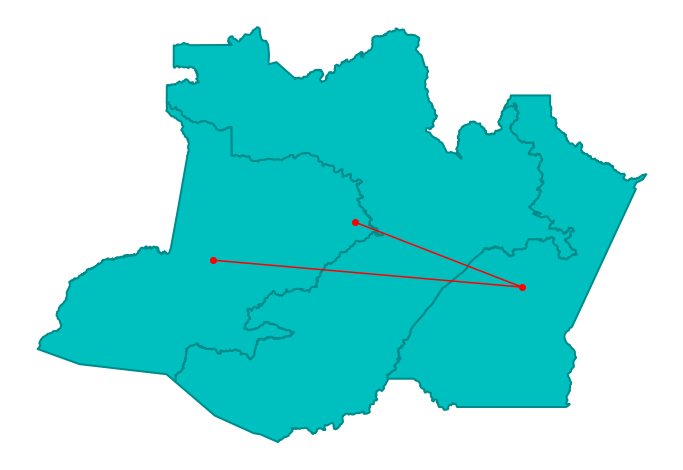

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

UF = 'AM'
macroregions_gdf = gpd.read_file("../../data/%s/template_dashboard/shapes/macroregions/shape.shp"%UF)
macroregions_gdf['center'] = macroregions_gdf['center'].apply(eval)

fig, ax = plt.subplots(figsize=(12, 10))
gpd.GeoSeries(macroregions_gdf['geometry']).plot(ax=ax, color="c", edgecolor="darkcyan", lw=2)
plt.plot(macroregions_gdf['center'].apply(lambda x: x[0]).to_list(), 
         macroregions_gdf['center'].apply(lambda x: x[1]).to_list(), 
         marker="o", color="red")
ax.axis("off")

In [7]:
pd.read_csv("../../../dashboard-regionalizacao-sus/data/%s/csv/mun_sih_flow.csv"%UF).iloc[0, 1]

"{'latlong': [-59.525533896656945, -3.7872305109991617], 'code': 130030, 'name': 'Autazes'}"

In [8]:
pd.read_csv("../../../dashboard-regionalizacao-sus/data/%s/csv/diagnosis/reg/reg_circulatory_system_sih_flow.csv"%UF).iloc[0, 1]

"{'latlong': ['[-57.78301983402671, -3.878545376148957]'], 'name': 'Baixo Amazonas'}"